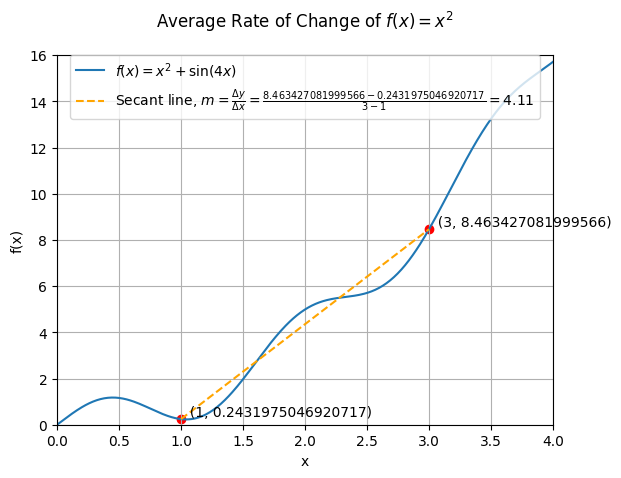

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and points
def f(x): 
    return x**2 + np.sin(4*x)

x0, x1 = 1, 3
y0, y1 = f(x0), f(x1)
m = (y1 - y0) / (x1 - x0)  # average rate of change

# Plot the curve
xs = np.linspace(0, 4, 400)
plt.plot(xs, f(xs), label=r'$f(x)=x^2 + \sin(4x)$')

# Plot the two points
plt.scatter([x0, x1], [y0, y1], color='red')
plt.text(x0, y0,   f'  ({x0}, {y0})', va='bottom')
plt.text(x1, y1,   f'  ({x1}, {y1})', va='bottom')

# Plot the secant line
secant_x = np.array([x0, x1])
secant_y = y0 + m*(secant_x - x0)
plt.plot(secant_x, secant_y, '--', color='orange',
         label=rf'Secant line, $m=\frac{{\Delta y}}{{\Delta x}}=\frac{{{y1}-{y0}}}{{{x1}-{x0}}}={m:.2f}$')

# Annotations and styling
plt.title('Average Rate of Change of $f(x)=x^2$', pad=20)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=1)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axis([0, 4, 0, 16])

# Save or show
plt.savefig('figures/avg_rate_of_change.png', dpi=150)
plt.show()

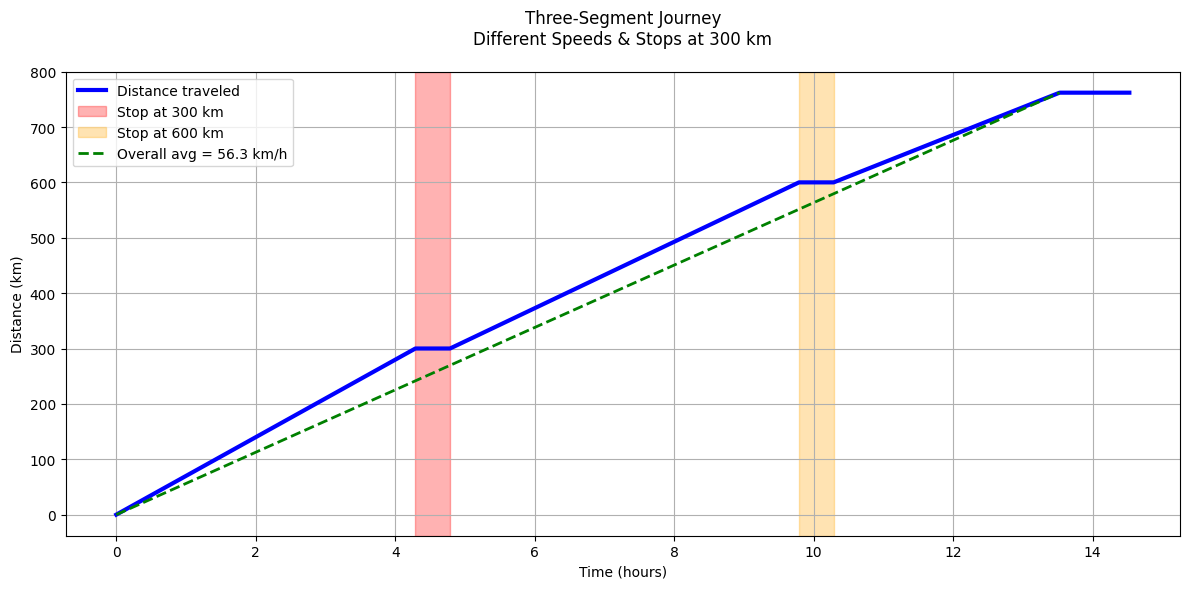

Leg1: 70 km/h, Leg2: 60 km/h, Leg3: 50 km/h
Total time (incl. stops): 13.53 hrs, Overall avg: 56.3 km/h


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for a 762 km journey with 30 min stops every 300 km
total_distance = 762
leg1_dist = 300
leg2_dist = 300
leg3_dist = total_distance - leg1_dist - leg2_dist

v1, v2, v3 = 70, 60, 50  # speeds (km/h) for each leg
rest_dur = 0.5  # hours of stop

# Compute time thresholds
t1 = leg1_dist / v1
t2 = t1 + rest_dur + leg2_dist / v2
t3 = t2 + rest_dur + leg3_dist / v3

def distance_function(t):
    if t <= t1:
        return v1 * t
    elif t <= t1 + rest_dur:
        return leg1_dist
    elif t <= t2:
        return leg1_dist + v2 * (t - t1 - rest_dur)
    elif t <= t2 + rest_dur:
        return leg1_dist + leg2_dist
    elif t <= t3:
        return leg1_dist + leg2_dist + v3 * (t - t2 - rest_dur)
    else:
        return total_distance

# Generate data
time_points = np.linspace(0, t3 + 1, 1200)
distances = [distance_function(t) for t in time_points]

# Plot journey with three slopes
plt.figure(figsize=(12, 6))
plt.plot(time_points, distances, 'b-', linewidth=3, label='Distance traveled')

# Shade rest periods
plt.axvspan(t1, t1 + rest_dur, alpha=0.3, color='red', label='Stop at 300 km')
plt.axvspan(t2, t2 + rest_dur, alpha=0.3, color='orange', label='Stop at 600 km')

# Overall average speed line
t_start, t_end = 0, t3
d_start, d_end = distance_function(t_start), distance_function(t_end)
avg_speed = (d_end - d_start) / (t_end - t_start)
plt.plot([t_start, t_end], [d_start, d_end], 'g--', linewidth=2,
         label=f'Overall avg = {avg_speed:.1f} km/h')

# Annotations and styling
plt.title('Three-Segment Journey\nDifferent Speeds & Stops at 300 km', pad=20)
plt.xlabel('Time (hours)')
plt.ylabel('Distance (km)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
print(f"Leg1: {v1} km/h, Leg2: {v2} km/h, Leg3: {v3} km/h")
print(f"Total time (incl. stops): {t3:.2f} hrs, Overall avg: {avg_speed:.1f} km/h")

Finding the slope of y = x² at point P(2.0, 4.0) using first principle
Secant line slopes:
h =  1.000: slope = (f(2.0+1.0) - f(2.0))/1.0 = (9.000 - 4.000)/1.0 = 5.000000
h =  0.500: slope = (f(2.0+0.5) - f(2.0))/0.5 = (6.250 - 4.000)/0.5 = 4.500000
h =  0.100: slope = (f(2.0+0.1) - f(2.0))/0.1 = (4.410 - 4.000)/0.1 = 4.100000
h =  0.010: slope = (f(2.0+0.01) - f(2.0))/0.01 = (4.040 - 4.000)/0.01 = 4.010000


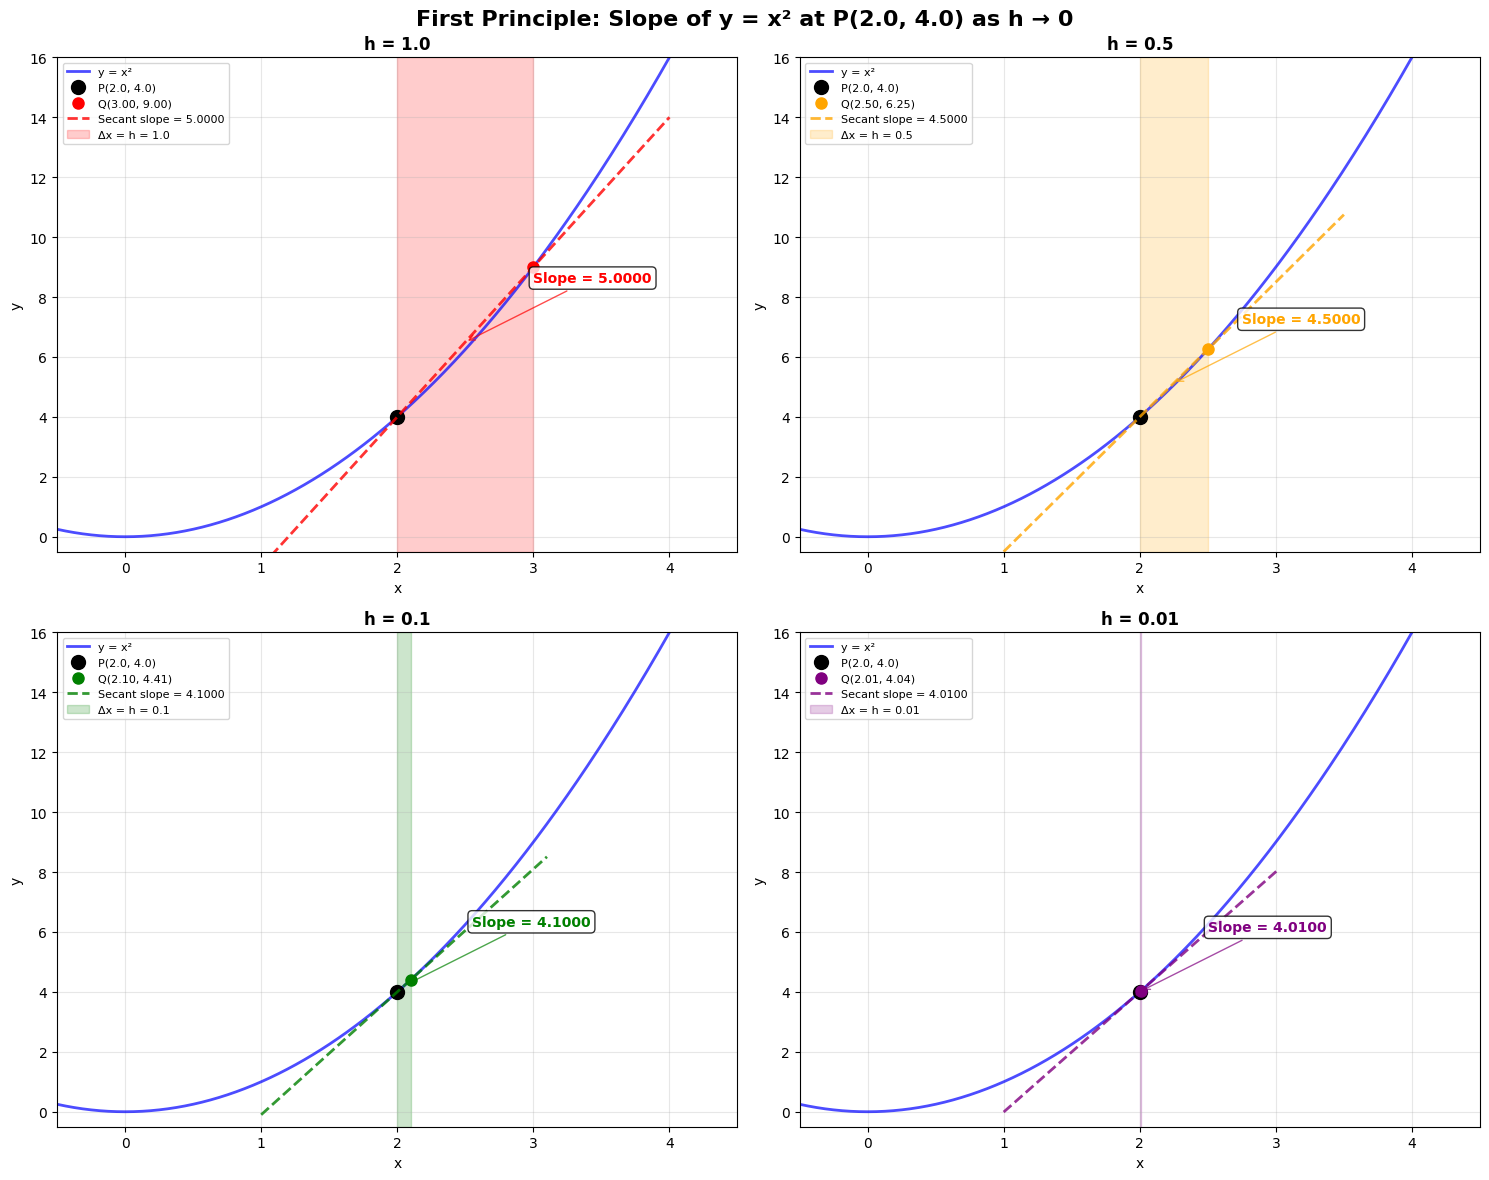


Detailed convergence as h approaches 0:
h            Secant Slope        Error from 4
----------------------------------------
 1.00000       5.00000000     1.00000000
 0.10000       4.10000000     0.10000000
 0.01000       4.01000000     0.01000000
 0.00100       4.00100000     0.00100000
 0.00010       4.00010000     0.00010000
 0.00001       4.00001000     0.00001000

Exact derivative at x = 2.0: f'(2.0) = 2x = 2(2.0) = 4.0


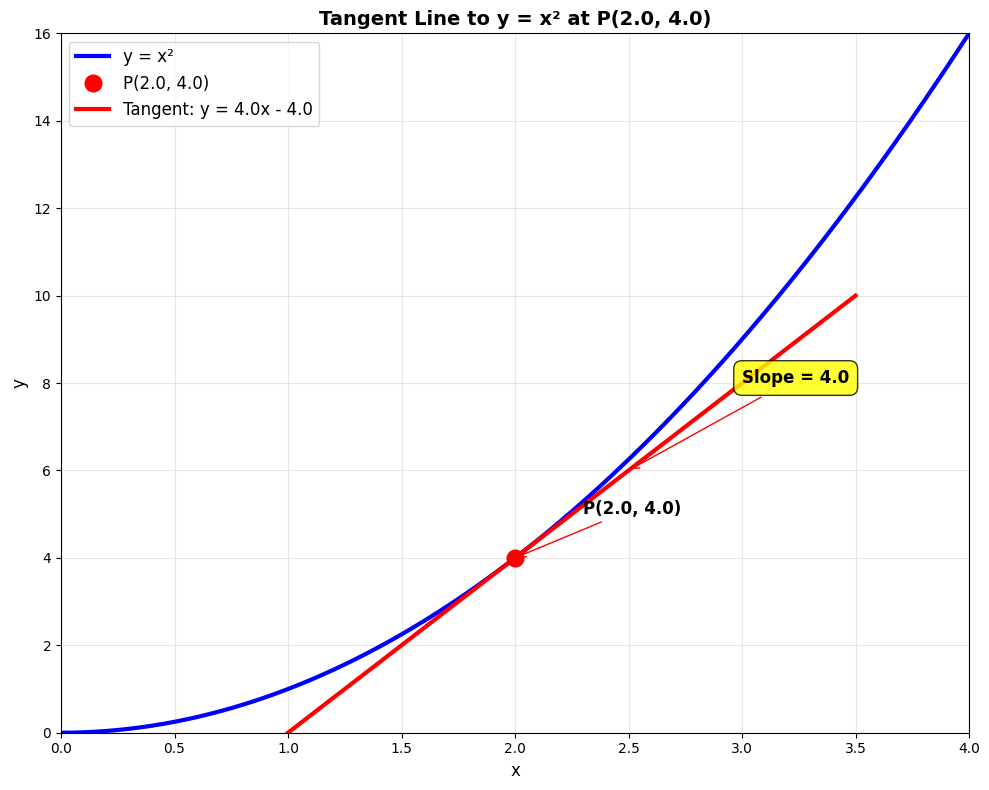


SOLUTION:
The slope of y = x² at point P(2.0, 4.0) is: 4.0
The equation of the tangent line is: y - 4.0 = 4.0(x - 2.0)
Simplified: y = 4.0x - 4.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem: Find the slope of y = x² at point P(2, 4) using first principle
def f(x):
    return x**2

# Point of interest
x0 = 2.0
y0 = f(x0)  # y0 = 4

print(f"Finding the slope of y = x² at point P({x0}, {y0}) using first principle")
print("=" * 60)

# Create figure with subplots to show secant lines approaching tangent
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle(f'First Principle: Slope of y = x² at P({x0}, {y0}) as h → 0', fontsize=16, fontweight='bold')

# Define h values (approaching 0)
h_values = [1.0, 0.5, 0.1, 0.01]
colors = ['red', 'orange', 'green', 'purple']
titles = [f'h = {h}' for h in h_values]

# Create x values for smooth curve
x = np.linspace(-0.5, 4.5, 400)
y = f(x)

axes = [ax1, ax2, ax3, ax4]

print("Secant line slopes:")
for i, (ax, h, color, title) in enumerate(zip(axes, h_values, colors, titles)):
    # Plot the parabola
    ax.plot(x, y, 'b-', linewidth=2, label='y = x²', alpha=0.7)
    
    # Points for secant line
    x1 = x0
    x2 = x0 + h
    y1 = f(x1)
    y2 = f(x2)
    
    # Calculate secant slope using first principle formula
    secant_slope = (f(x0 + h) - f(x0)) / h
    
    # Plot the two points
    ax.plot(x1, y1, 'ko', markersize=10, label=f'P({x1}, {y1})')
    ax.plot(x2, y2, 'o', color=color, markersize=8, label=f'Q({x2:.2f}, {y2:.2f})')
    
    # Draw secant line
    x_secant = np.linspace(max(0, x1 - 1), min(5, x2 + 1), 100)
    y_secant = y1 + secant_slope * (x_secant - x1)
    ax.plot(x_secant, y_secant, '--', color=color, linewidth=2, alpha=0.8,
            label=f'Secant slope = {secant_slope:.4f}')
    
    # Highlight the interval Δx = h
    ax.axvspan(x1, x2, alpha=0.2, color=color, label=f'Δx = h = {h}')
    
    # Add slope annotation
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    ax.annotate(f'Slope = {secant_slope:.4f}', 
                xy=(mid_x, mid_y), 
                xytext=(mid_x + 0.5, mid_y + 2),
                arrowprops=dict(arrowstyle='->', color=color, alpha=0.7),
                fontsize=10, color=color, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))
    
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 16)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8, loc='upper left')
    
    print(f"h = {h:6.3f}: slope = (f({x0}+{h}) - f({x0}))/{h} = ({f(x0+h):.3f} - {f(x0):.3f})/{h} = {secant_slope:.6f}")

plt.tight_layout()
plt.show()

# Show numerical convergence to the exact derivative
print("\nDetailed convergence as h approaches 0:")
print("h" + " " * 12 + "Secant Slope" + " " * 8 + "Error from 4")
print("-" * 40)

exact_slope = 4.0  # The derivative of x² at x=2 is 2x = 2(2) = 4

for h in [1.0, 0.1, 0.01, 0.001, 0.0001, 0.00001]:
    slope = (f(x0 + h) - f(x0)) / h
    error = abs(slope - exact_slope)
    print(f"{h:8.5f}     {slope:12.8f}     {error:10.8f}")

print(f"\nExact derivative at x = {x0}: f'({x0}) = 2x = 2({x0}) = {exact_slope}")

# Create a separate plot showing the tangent line
plt.figure(figsize=(10, 8))
x_plot = np.linspace(0, 4, 400)
y_plot = f(x_plot)

# Plot the parabola
plt.plot(x_plot, y_plot, 'b-', linewidth=3, label='y = x²')

# Plot the point P(2, 4)
plt.plot(x0, y0, 'ro', markersize=12, label=f'P({x0}, {y0})')

# Plot the tangent line: y - 4 = 4(x - 2) => y = 4x - 4
x_tangent = np.linspace(0.5, 3.5, 100)
y_tangent = exact_slope * (x_tangent - x0) + y0  # y - y0 = m(x - x0)
plt.plot(x_tangent, y_tangent, 'r-', linewidth=3, label=f'Tangent: y = {exact_slope}x - {exact_slope * x0 - y0}')

# Add annotations
plt.annotate(f'P({x0}, {y0})', xy=(x0, y0), xytext=(x0 + 0.3, y0 + 1),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, fontweight='bold')

plt.annotate(f'Slope = {exact_slope}', xy=(2.5, exact_slope * (2.5 - x0) + y0), 
             xytext=(3, 8),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8))

plt.xlim(0, 4)
plt.ylim(0, 16)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title(f'Tangent Line to y = x² at P({x0}, {y0})', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Final answer
print("\n" + "=" * 60)
print("SOLUTION:")
print("=" * 60)
print(f"The slope of y = x² at point P({x0}, {y0}) is: {exact_slope}")
print(f"The equation of the tangent line is: y - {y0} = {exact_slope}(x - {x0})")
print(f"Simplified: y = {exact_slope}x - {exact_slope * x0 - y0}")
print("=" * 60)